<h4>My First task in Sparks Foundation Internship - Predict the percentage of an student based on the no. of study hours.</h4><br>
This is a simple linear regression task as it involves just 2 variables.

<h2>What is linear regression?</h2>
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an independent variable, and the other is considered to be a dependent variable.


In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


Reading the data

In [2]:
data=pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Visualizing using scatter plot

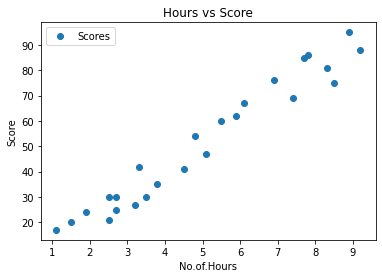

In [3]:
#Visualizing using scatterplot
data.plot(x='Hours',y='Scores',style='o')
plt.xlabel("No.of.Hours")
plt.ylabel("Score")
plt.title("Hours vs Score")
plt.show()

Assigning independent var "Hours" to X and dependent var "scores" to Y

In [4]:
# Assigning independent var "Hours" to X and dependent var "scores" to Y
X=np.array(data['Hours'])

Y=np.array(data['Scores'])

Splitting the dataset into train and test data

In [5]:
#Splitting the dataset into train and test dataset 
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=1) 

Creating a Linear Regression Model

In [6]:
#Fitting the values into linear regression model
linear_reg=LinearRegression()
linear_reg.fit(x_train.reshape(-1,1),y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#coefficients and intercepts
print("Linear Regression model coefficient : ",linear_reg.coef_)
print("Linear Regression model intercepts : ",linear_reg.intercept_)

Linear Regression model coefficient :  [10.46110829]
Linear Regression model intercepts :  -1.5369573315500702


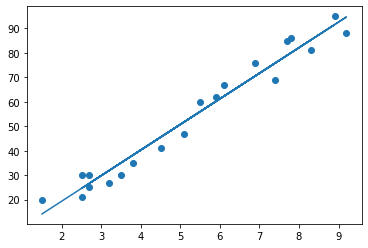

In [15]:
# visualizing to see the regresssion line
reg_line = linear_reg.coef_*x_train+linear_reg.intercept_

# Plotting for the test data
plt.scatter(x_train, y_train)
plt.plot(x_train, reg_line);
plt.show()


Prediction using test data

In [8]:
#Prediction using test data
Yhat=linear_reg.predict(np.array(x_test).reshape(-1,1))
Yhat

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

Comparing actual test data and predicted test data

In [9]:
# Creating Actual and predicted value dataframe
act_pred_dict={'Actual data':y_test,'Predicted data':Yhat} 
act_pred_df=pd.DataFrame(act_pred_dict)
act_pred_df

,Actual data,Predicted data
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


Evaluating our model using metrics to see the performance

In [10]:
#Evaluating Algorithm using metrics
from sklearn import metrics
mean_square_error=metrics.mean_squared_error(Yhat,y_test)
print("The Mean square error is : ",mean_square_error)
mean_absolute_error=metrics.mean_absolute_error(Yhat,y_test)
print("The mean absolute error is : ",mean_absolute_error)

The Mean square error is :  68.88092074277635
The mean absolute error is :  7.882398086270432


Predicting the score for input hour 9.25

In [11]:
#Predicting the  model using real world data
hours=float(input("Enter the hours : "))
score=linear_reg.predict(np.array(hours).reshape(-1,1))
print("The predicted score for the hour {0} is {1}".format(hours,score))

Enter the hours : 9.25
The predicted score for the hour 9.25 is [95.22829438]


From the above result we can say that the student can take 95.22 percentage when he/she studied for 9.25 hours.